<a href="https://colab.research.google.com/github/Anindita-172/College-Placement-Predictor/blob/main/CampusPlacementPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [ ]:
data = pd.read_csv('Placement_Data_Full_Class.csv')
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
data.shape

(215, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [ ]:
data



,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [ ]:
data.describe()


,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [ ]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

Handling the Null valus

In [ ]:
def plotdistplot(col):
    
    plt.figure(figsize=(15,7))
    sns.distplot(data['salary'],kde=True,hist=False,label='Actual Salary',color='orange')
    sns.distplot(data[col],kde=True,hist=False,label=col,color='black')

In [ ]:
data['salary_mean'] = data['salary'].fillna(data['salary'].mean())

In [ ]:
data['salary_median'] = data['salary'].fillna(data['salary'].median())

In [ ]:
data['salary_mode'] = data['salary'].fillna(data['salary'].mode())

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

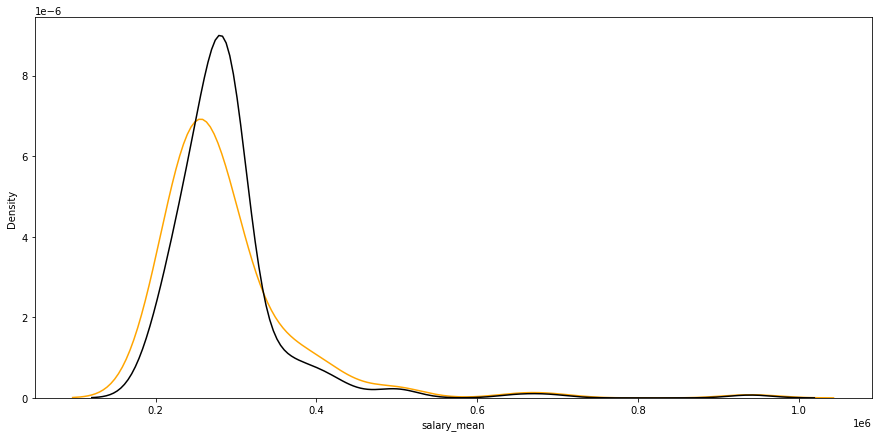

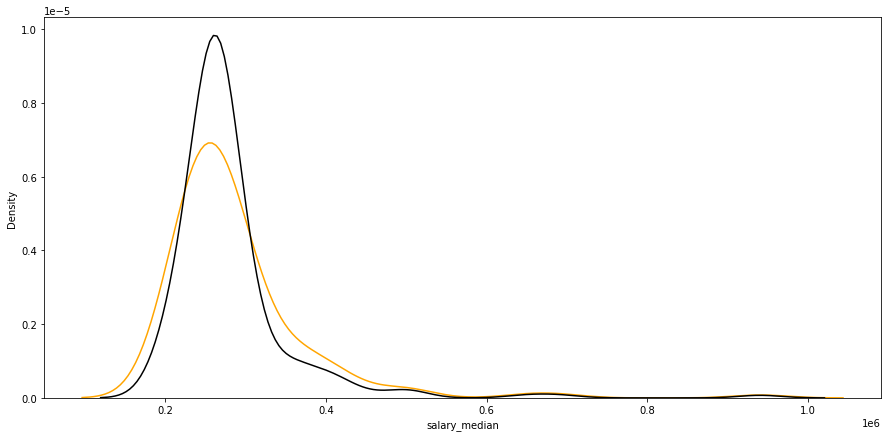

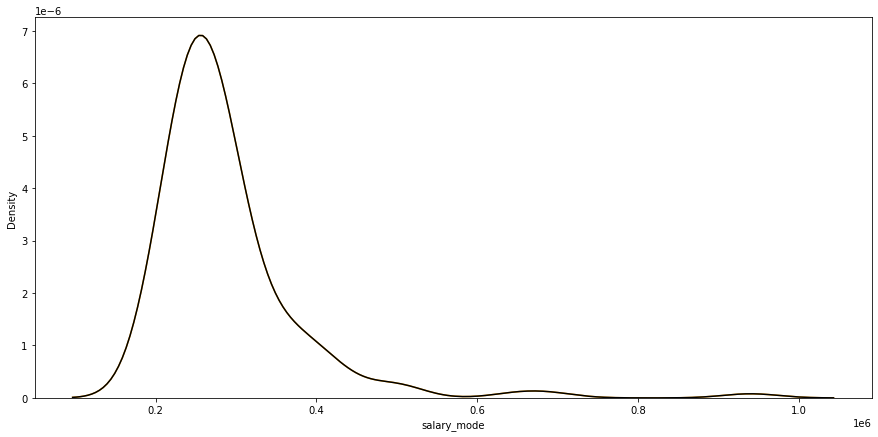

In [ ]:
sallist = ['salary_mean','salary_median','salary_mode']
for sal in sallist:
    plotdistplot(sal)

Since we have 67 null vales we have to replace it with mean values as if we fill it with 30000 then the values will not predict a perfect ans


In [ ]:
# filling the salary with mean
data['salary'] = data['salary'].fillna(data['salary'].mean())

In [ ]:
data = data.drop(columns=['salary_mean', 'salary_median', 'salary_mode'],axis=1)

Exploratory data Analysis

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


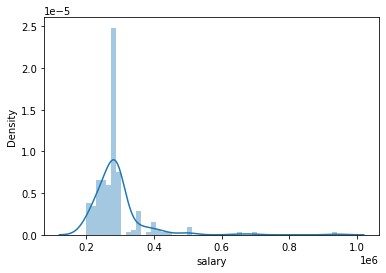

In [ ]:
sns.distplot(data['salary'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


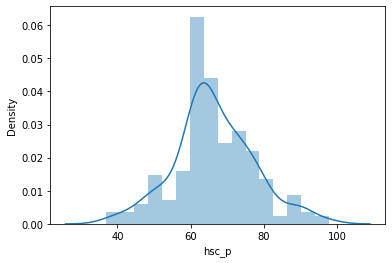

In [ ]:
sns.distplot(data['hsc_p'])

Count Plot for feature status is shown ↓


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


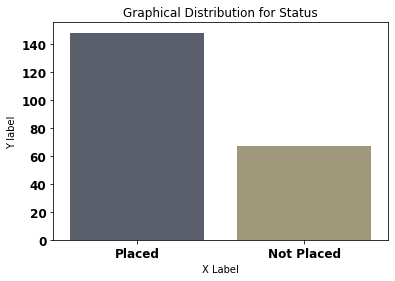

In [ ]:
sns.countplot(data['status'],palette='cividis')
plt.title("Graphical Distribution for Status")
plt.xlabel("X Label")
plt.ylabel("Y label")
plt.xticks(fontweight = 'bold',fontsize = '12')
plt.yticks(fontweight = 'bold',fontsize = '12')
print(f'Count Plot for feature status is shown ↓')
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Count Plot for feature ssc_b is shown ↓


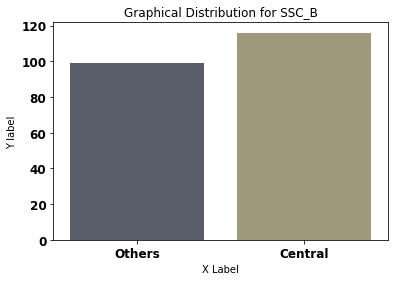

In [ ]:
sns.countplot(data['ssc_b'],palette='cividis')
plt.title("Graphical Distribution for SSC_B")
plt.xlabel("X Label")
plt.ylabel("Y label")
plt.xticks(fontweight = 'bold',fontsize = '12')
plt.yticks(fontweight = 'bold',fontsize = '12')
print(f'Count Plot for feature ssc_b is shown ↓')
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Count Plot for feature specialisation is shown ↓


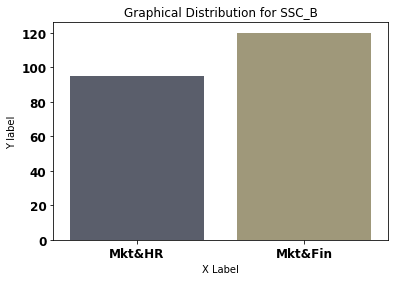

In [ ]:
sns.countplot(data['specialisation'],palette='cividis')
plt.title("Graphical Distribution for SSC_B")
plt.xlabel("X Label")
plt.ylabel("Y label")
plt.xticks(fontweight = 'bold',fontsize = '12')
plt.yticks(fontweight = 'bold',fontsize = '12')
print(f'Count Plot for feature specialisation is shown ↓')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Count Plot for feature gender is shown ↓


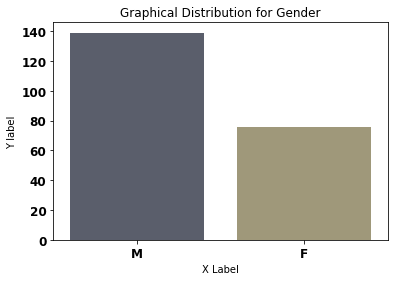

In [ ]:
sns.countplot(data['gender'],palette='cividis')
plt.title("Graphical Distribution for Gender")
plt.xlabel("X Label")
plt.ylabel("Y label")
plt.xticks(fontweight = 'bold',fontsize = '12')
plt.yticks(fontweight = 'bold',fontsize = '12')
print(f'Count Plot for feature gender is shown ↓')
plt.show()


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Count Plot for feature hsc_s is shown ↓


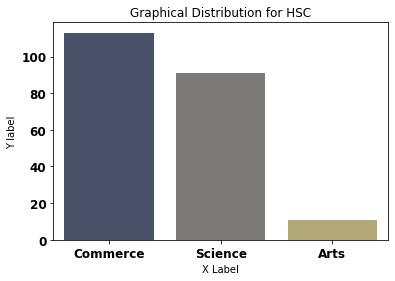

In [ ]:
sns.countplot(data['hsc_s'],palette='cividis')
plt.title("Graphical Distribution for HSC")
plt.xlabel("X Label")
plt.ylabel("Y label")
plt.xticks(fontweight = 'bold',fontsize = '12')
plt.yticks(fontweight = 'bold',fontsize = '12')
print(f'Count Plot for feature hsc_s is shown ↓')
plt.show()


Value count for the categorical variables

In [ ]:
dict(data['gender'].value_counts())


{'M': 139, 'F': 76}

In [ ]:
dict(data['hsc_s'].value_counts())

{'Commerce': 113, 'Science': 91, 'Arts': 11}

In [ ]:
dict(data['specialisation'].value_counts())

{'Mkt&Fin': 120, 'Mkt&HR': 95}

In [ ]:
dict(data['status'].value_counts())

{'Placed': 148, 'Not Placed': 67}

In [ ]:
dict(data['workex'].value_counts())

{'No': 141, 'Yes': 74}

In [ ]:
#top science students placed

data[(data['degree_t']=='Sci&Tech')&(data['status']=='Placed')].sort_values(by = 'salary',ascending = False).reset_index().head(10)
   

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,150,151,M,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.0,Mkt&Fin,61.30,Placed,690000.0
1,77,78,M,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.0,Mkt&Fin,57.65,Placed,500000.0
2,163,164,M,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.0,Mkt&Fin,66.46,Placed,500000.0
3,174,175,M,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.0,Mkt&Fin,66.23,Placed,500000.0
4,53,54,M,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.0,Mkt&HR,71.04,Placed,450000.0
5,39,40,M,81.00,Others,68.00,Others,Science,64.00,Sci&Tech,No,93.0,Mkt&Fin,62.56,Placed,411000.0
6,145,146,M,89.40,Others,65.66,Others,Science,71.25,Sci&Tech,No,72.0,Mkt&HR,63.23,Placed,400000.0
7,128,129,M,80.40,Central,73.40,Central,Science,77.72,Sci&Tech,Yes,81.2,Mkt&HR,76.26,Placed,400000.0
8,24,25,M,76.50,Others,97.70,Others,Science,78.86,Sci&Tech,No,97.4,Mkt&Fin,74.01,Placed,360000.0
9,70,71,M,82.00,Others,61.00,Others,Science,62.00,Sci&Tech,No,89.0,Mkt&Fin,65.45,Placed,360000.0


In [ ]:
# top Commerce students placed
data[(data['degree_t']=='Comm&Mgmt')&(data['status']=='Placed')].sort_values(by = 'salary',ascending = False).reset_index().head(10)
   

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,119,120,M,60.80,Central,68.40,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
1,177,178,F,73.00,Central,97.00,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0
2,4,5,M,85.80,Central,73.60,Central,Commerce,73.3,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
3,95,96,M,73.00,Central,78.00,Others,Commerce,65.0,Comm&Mgmt,Yes,95.46,Mkt&Fin,62.16,Placed,420000.0
4,210,211,M,80.60,Others,82.00,Others,Commerce,77.6,Comm&Mgmt,No,91.00,Mkt&Fin,74.49,Placed,400000.0
5,85,86,F,83.84,Others,89.83,Others,Commerce,77.2,Comm&Mgmt,Yes,78.74,Mkt&Fin,76.18,Placed,400000.0
6,21,22,F,79.00,Others,76.00,Others,Commerce,85.0,Comm&Mgmt,No,95.00,Mkt&Fin,69.06,Placed,393000.0
7,101,102,M,63.00,Central,72.00,Central,Commerce,68.0,Comm&Mgmt,No,78.00,Mkt&HR,60.44,Placed,380000.0
8,57,58,M,68.00,Central,76.00,Central,Commerce,74.0,Comm&Mgmt,No,80.00,Mkt&Fin,63.59,Placed,360000.0
9,104,105,M,69.00,Central,63.00,Others,Science,65.0,Comm&Mgmt,Yes,55.00,Mkt&HR,58.23,Placed,360000.0


In [ ]:
# max and min salary
# observation : max salary : 9,40,000 and min salary : 2,00,000

data[(data['salary']==max(data['salary'])) | (data['salary']==min(data['salary']))]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
15,16,F,65.00,Central,75.00,Central,Commerce,69.00,Comm&Mgmt,Yes,72.00,Mkt&Fin,64.66,Placed,200000.0
44,45,F,77.00,Others,73.00,Others,Commerce,81.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,69.70,Placed,200000.0
50,51,F,75.20,Central,73.20,Central,Science,68.40,Comm&Mgmt,No,65.00,Mkt&HR,62.98,Placed,200000.0
107,108,M,82.00,Others,90.00,Others,Commerce,83.00,Comm&Mgmt,No,80.00,Mkt&HR,73.52,Placed,200000.0
119,120,M,60.80,Central,68.40,Central,Commerce,64.60,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
135,136,F,72.00,Central,56.00,Others,Science,69.00,Comm&Mgmt,No,55.60,Mkt&HR,65.63,Placed,200000.0


In [ ]:
# students with salary more than avg salary science dept

data[(data['degree_t']=='Sci&Tech')&(data['salary']>data['salary'].mean())].sort_values(by = 'salary',ascending = False).reset_index()

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,150,151,M,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.00,Mkt&Fin,61.30,Placed,690000.0
1,174,175,M,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.00,Mkt&Fin,66.23,Placed,500000.0
2,77,78,M,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.00,Mkt&Fin,57.65,Placed,500000.0
3,163,164,M,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.00,Mkt&Fin,66.46,Placed,500000.0
4,53,54,M,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.00,Mkt&HR,71.04,Placed,450000.0
5,39,40,M,81.00,Others,68.00,Others,Science,64.00,Sci&Tech,No,93.00,Mkt&Fin,62.56,Placed,411000.0
6,145,146,M,89.40,Others,65.66,Others,Science,71.25,Sci&Tech,No,72.00,Mkt&HR,63.23,Placed,400000.0
7,128,129,M,80.40,Central,73.40,Central,Science,77.72,Sci&Tech,Yes,81.20,Mkt&HR,76.26,Placed,400000.0
8,22,23,F,69.80,Others,60.80,Others,Science,72.23,Sci&Tech,No,55.53,Mkt&HR,68.81,Placed,360000.0
9,24,25,M,76.50,Others,97.70,Others,Science,78.86,Sci&Tech,No,97.40,Mkt&Fin,74.01,Placed,360000.0


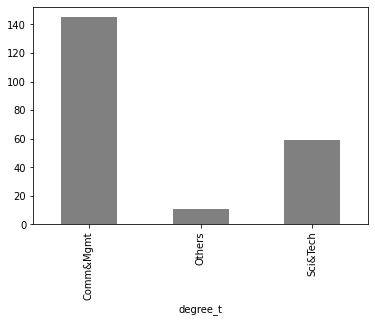

In [ ]:
# maximum students placed are from comm&mgt

data.groupby(['degree_t'])['status'].count().plot(kind = 'bar',color = 'grey')

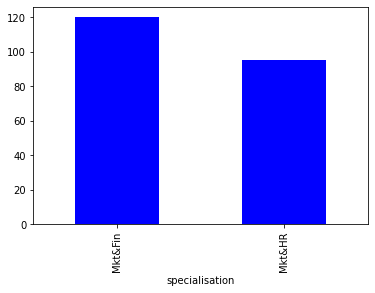

In [ ]:
# Marketing and Finance specialisation are placed more

data.groupby(['specialisation'])['status'].count().plot(kind = 'bar',color = 'blue')

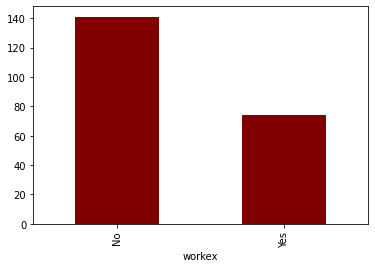

In [ ]:
# Less experienced candidates have been placed

data.groupby(['workex'])['status'].count().plot(kind = 'bar',color = 'maroon')

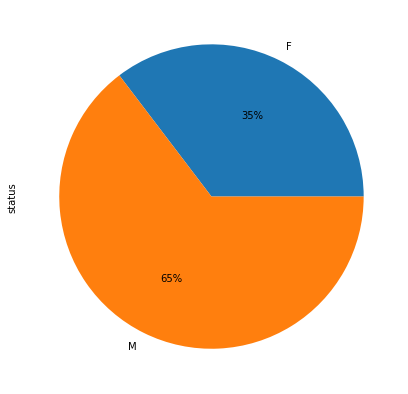

In [ ]:
# females placed 35% and males 65%

data.groupby(['gender'])['status'].count().plot(kind = 'pie',autopct='%1.0f%%',figsize=(15,7))

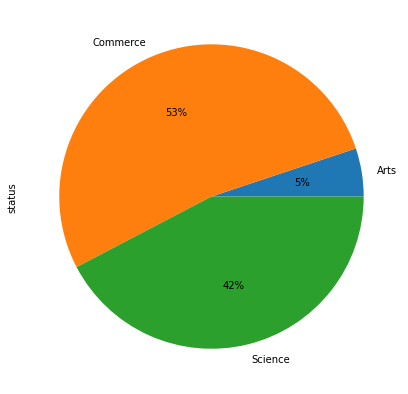

In [ ]:
data.groupby(['hsc_s'])['status'].count().plot(kind = 'pie',autopct='%1.0f%%',figsize=(15,7))

In [ ]:
# max female salary ~ 6,50,000

temp = data[data['gender']=='F']
temp[temp['salary']==max(temp['salary'])]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
177,178,F,73.0,Central,97.0,Others,Commerce,79.0,Comm&Mgmt,Yes,89.0,Mkt&Fin,70.81,Placed,650000.0


In [ ]:
# max Male salary ~ 9,40,000

temp = data[data['gender']=='M']
temp[temp['salary']==max(temp['salary'])]

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
119,120,M,60.8,Central,68.4,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0


Label encoding

In [ ]:
# removing unwated columns

data = data.drop(['sl_no'],axis=1)
data.head(2)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0


Numerical data EDA

In [ ]:
numvars = list(data.select_dtypes(include=['int32','int64','float32','float64']).columns)
print(numvars)

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


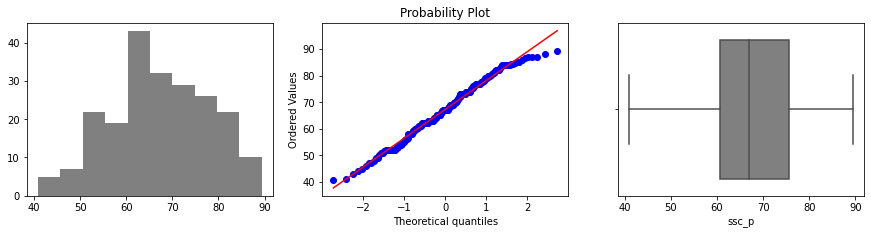

In [ ]:
#Graphical representation of ssc_p
plt.figure(figsize=(15,7))
plt.subplot(2,3,1)
plt.hist(data['ssc_p'],color='grey')
plt.subplot(2,3,2)
stats.probplot(data['ssc_p'],dist='norm',plot=plt)
plt.subplot(2,3,3)
sns.boxplot(data['ssc_p'],color='grey')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


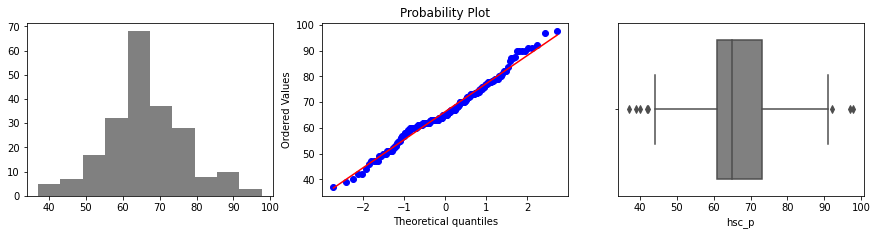

In [ ]:
#Graphical representation of hsc_p
plt.figure(figsize=(15,7))
plt.subplot(2,3,1)
plt.hist(data['hsc_p'],color='grey')
plt.subplot(2,3,2)
stats.probplot(data['hsc_p'],dist='norm',plot=plt)
plt.subplot(2,3,3)
sns.boxplot(data['hsc_p'],color='grey')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


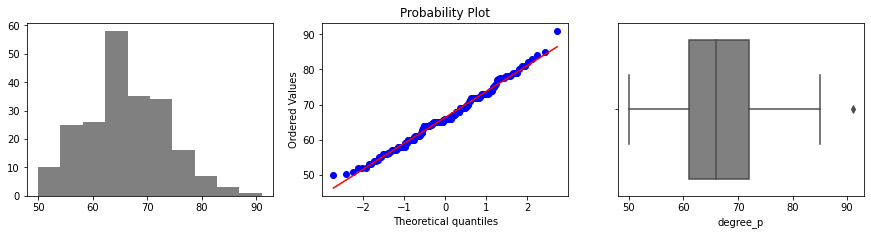

In [ ]:
#Graphical representation of degree_p
plt.figure(figsize=(15,7))
plt.subplot(2,3,1)
plt.hist(data['degree_p'],color='grey')
plt.subplot(2,3,2)
stats.probplot(data['degree_p'],dist='norm',plot=plt)
plt.subplot(2,3,3)
sns.boxplot(data['degree_p'],color='grey')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


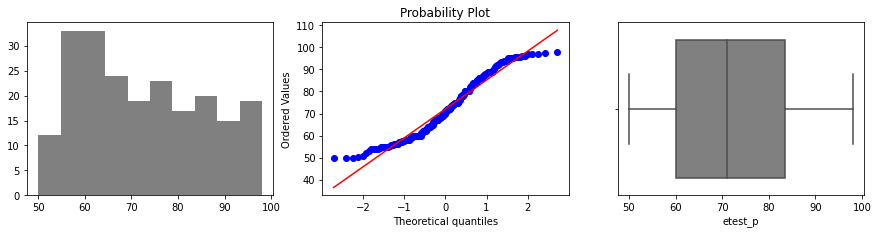

In [ ]:
#Graphical representation of etest_p
plt.figure(figsize=(15,7))
plt.subplot(2,3,1)
plt.hist(data['etest_p'],color='grey')
plt.subplot(2,3,2)
stats.probplot(data['etest_p'],dist='norm',plot=plt)
plt.subplot(2,3,3)
sns.boxplot(data['etest_p'],color='grey')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


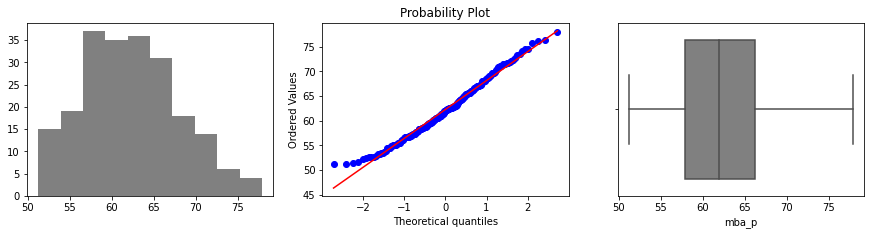

In [ ]:
#Graphical representation of mba_p
plt.figure(figsize=(15,7))
plt.subplot(2,3,1)
plt.hist(data['mba_p'],color='grey')
plt.subplot(2,3,2)
stats.probplot(data['mba_p'],dist='norm',plot=plt)
plt.subplot(2,3,3)
sns.boxplot(data['mba_p'],color='grey')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


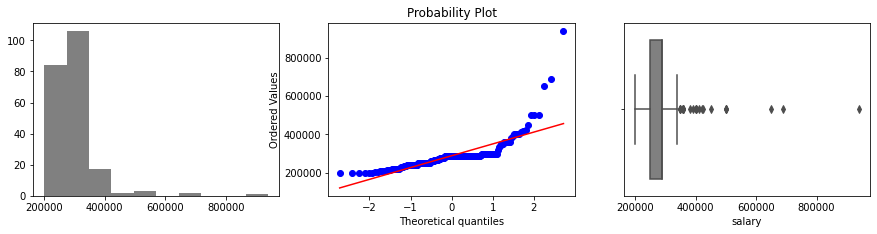

In [ ]:
#Graphical representation of salary
plt.figure(figsize=(15,7))
plt.subplot(2,3,1)
plt.hist(data['salary'],color='grey')
plt.subplot(2,3,2)
stats.probplot(data['salary'],dist='norm',plot=plt)
plt.subplot(2,3,3)
sns.boxplot(data['salary'],color='grey')
plt.show()

Feature Selection

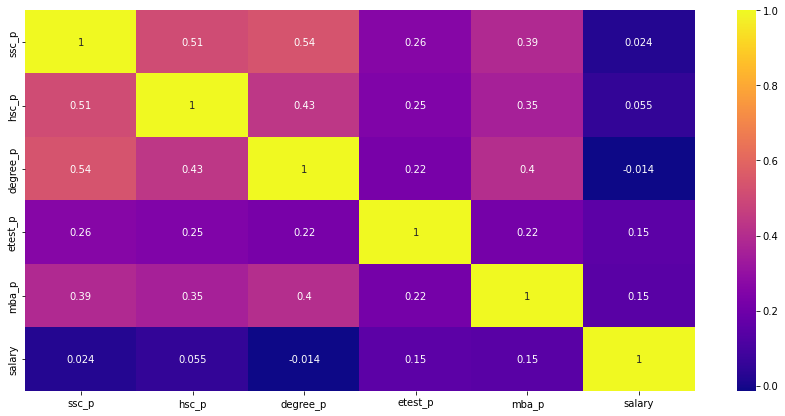

In [ ]:
# checking for tightly correlated features

plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,cmap='plasma')

In [ ]:
data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.000000
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.000000
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.000000
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.000000


In [ ]:
#Converting categorical variables to numberical variables
def ref1(x):
  if x == 'F':
    return 0
  elif x == 'M':
    return 1

data['gender'] = data['gender'].map(ref1)

In [ ]:
#Converting categorical variables to numberical variables
def ref1(x):
  if x == 'Central':
    return 0
  elif x == 'Others':
    return 1

data['ssc_b'] = data['ssc_b'].map(ref1)

In [ ]:
#Converting categorical variables to numberical variables
def ref3(x):
  if x == 'Central':
    return 0
  elif x == 'Others':
    return 1

data['hsc_b'] = data['hsc_b'].map(ref3)

In [ ]:
#Converting categorical variables to numberical variables
def ref4(x):
  if x == 'Arts':
    return 0
  elif x == 'Commerce':
    return 1
  elif x == 'Science':
    return 2

data['hsc_s'] = data['hsc_s'].map(ref4)

In [ ]:
data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,1,79.33,0,78.33,1,2,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,1,65.00,0,68.00,0,0,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,1,56.00,0,52.00,0,2,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,1,85.80,0,73.60,0,1,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.000000
211,1,58.00,1,60.00,1,2,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.000000
212,1,67.00,1,67.00,1,1,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.000000
213,0,74.00,1,66.00,1,1,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.000000


In [ ]:
data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,1,79.33,0,78.33,1,2,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,1,65.00,0,68.00,0,0,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,1,56.00,0,52.00,0,2,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,1,85.80,0,73.60,0,1,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.000000
211,1,58.00,1,60.00,1,2,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.000000
212,1,67.00,1,67.00,1,1,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.000000
213,0,74.00,1,66.00,1,1,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.000000


In [ ]:
data = data.replace({'degree_t' : { 'Sci&Tech' : 'ST', 'Comm&Mgmt': 'CM'}})

In [ ]:
#Converting categorical variables to numberical variables
def ref1(x):
  if x == 'CM':
    return 0
  elif x == 'Others':
    return 1
  elif x == 'ST':
    return 2

data['degree_t'] = data['degree_t'].map(ref1)

In [ ]:
data= data.replace({'specialisation' : { 'Mkt&HR' : 'MHR', 'Mkt&Fin': 'MFin'}})

In [ ]:
#Converting categorical variables to numberical variables
def ref5(x):
  if x == 'MFin':
    return 0
  elif x == 'MHR':
    return 1

data['specialisation'] = data['specialisation'].map(ref5)

In [ ]:
data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,No,55.0,1,58.80,Placed,270000.000000
1,1,79.33,0,78.33,1,2,77.48,2,Yes,86.5,0,66.28,Placed,200000.000000
2,1,65.00,0,68.00,0,0,64.00,0,No,75.0,0,57.80,Placed,250000.000000
3,1,56.00,0,52.00,0,2,52.00,2,No,66.0,1,59.43,Not Placed,288655.405405
4,1,85.80,0,73.60,0,1,73.30,0,No,96.8,0,55.50,Placed,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,No,91.0,0,74.49,Placed,400000.000000
211,1,58.00,1,60.00,1,2,72.00,2,No,74.0,0,53.62,Placed,275000.000000
212,1,67.00,1,67.00,1,1,73.00,0,Yes,59.0,0,69.72,Placed,295000.000000
213,0,74.00,1,66.00,1,1,58.00,0,No,70.0,1,60.23,Placed,204000.000000


In [ ]:
#Converting categorical variables to numberical variables
def ref6(x):
  if x == 'No':
    return 0
  elif x == 'Yes':
    return 1

data['workex'] = data['workex'].map(ref6)

In [ ]:
data = data.replace({'status' : { 'Not Placed' : 'NOTPlaced','Placed': 'placed'}})

In [ ]:
#Converting categorical variables to numberical variables
def ref7(x):
  if x == 'NOTPlaced':
    return 0
  elif x == 'placed':
    return 1

data['status'] = data['status'].map(ref7)

In [ ]:
data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.000000
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.000000
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.000000
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,288655.405405
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.000000
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.000000
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.000000
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.000000


In [ ]:
data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.000000
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.000000
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.000000
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,288655.405405
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.000000
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.000000
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.000000
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.000000


In [ ]:
#We will drop the salary column as well
#coz after getting the placement we will get to know the salary right!
data = data.copy()
test = data['status']
train = data.drop(['status','salary'],axis = 1)
train.head(5)
#test.head(5)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50


In [ ]:
test

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 215, dtype: int64

In [ ]:
## extratrees classifier

from sklearn.ensemble import ExtraTreesClassifier
ec = ExtraTreesClassifier()
ec.fit(train,test)

ExtraTreesClassifier()

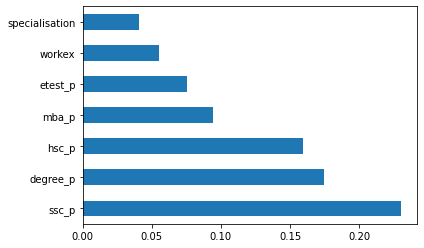

In [ ]:
featbar = pd.Series(ec.feature_importances_,index=train.columns)
featbar.nlargest(7).plot(kind = 'barh')

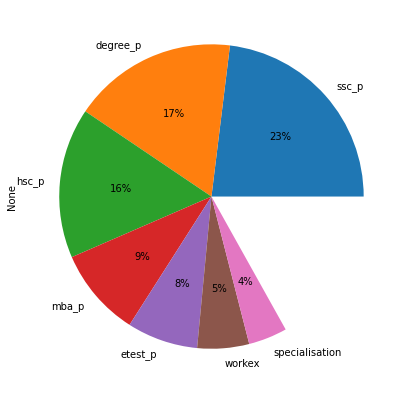

In [ ]:
featbar.nlargest(7).plot(kind='pie',autopct='%1.0f%%',figsize = (15,7))

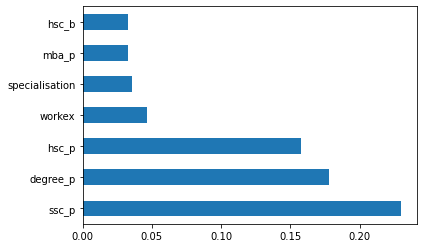

In [ ]:
# mutual classif

from sklearn.feature_selection import mutual_info_classif
mc = mutual_info_classif(train,test)
ax = pd.Series(mc,index=train.columns)
ax.nlargest(7).plot(kind = 'barh')

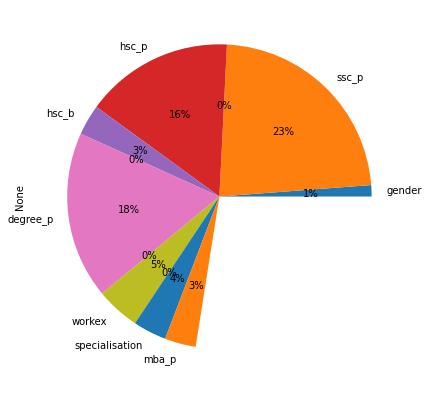

In [ ]:
pd.Series(mc,index=train.columns).plot(kind = 'pie',autopct='%1.0f%%',figsize = (15,7))

In [ ]:

#Selecting the top 10 contributing features in both cases
#and then we will do the intersection of both the results
#so that we will get atleast top 5 most contributing features!



featcol = list(featbar.nlargest(10).index)
mutclasif = list(ax.nlargest(10).index)
commoncols = list(set(featcol).intersection(set(mutclasif)))
print(commoncols)

['mba_p', 'specialisation', 'ssc_p', 'degree_p', 'hsc_s', 'hsc_p', 'ssc_b', 'workex', 'gender']


In [ ]:
# selecting the common cols and will do training on these cols!
# these cols were selected as a nlargest result of 2 feature selection techniques!

train = data[commoncols]
train.head()

,mba_p,specialisation,ssc_p,degree_p,hsc_s,hsc_p,ssc_b,workex,gender
0,58.80,1,67.00,58.00,1,91.00,1,0,1
1,66.28,0,79.33,77.48,2,78.33,0,1,1
2,57.80,0,65.00,64.00,0,68.00,0,0,1
3,59.43,1,56.00,52.00,2,52.00,0,0,1
4,55.50,0,85.80,73.30,1,73.60,0,0,1


In [ ]:
# renaming the cols

train = train[['gender','specialisation','workex','ssc_p','hsc_p','degree_p','mba_p']]
train.columns = ['Gender','Specialisation','Work Experience','SSC_p','High School_p','Degree_p','MBA_p']
train.head()

,Gender,Specialisation,Work Experience,SSC_p,High School_p,Degree_p,MBA_p
0,1,1,0,67.00,91.00,58.00,58.80
1,1,0,1,79.33,78.33,77.48,66.28
2,1,0,0,65.00,68.00,64.00,57.80
3,1,1,0,56.00,52.00,52.00,59.43
4,1,0,0,85.80,73.60,73.30,55.50


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score
from sklearn import metrics

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train,test,test_size=0.2)
X_train.shape,X_test.shape

((172, 7), (43, 7))

In [ ]:
dc = DecisionTreeClassifier()
dc.fit(X_train,y_train)


DecisionTreeClassifier()

In [ ]:
train_score=dc.score(X_train,y_train)
test_score=dc.score(X_test,y_test)

In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test, dc.predict(X_test)))

Accuracy: 0.7906976744186046


HyperParameter TTuning

In [ ]:
params = {
    'RandomForest':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators': [int(x) for x in np.linspace(start=1,stop=1200,num=10)],
            'max_depth':[int(x) for x in np.linspace(start=1,stop=30,num=5)],
            'min_samples_split':[2,5,10,12],
            'min_samples_leaf':[2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[0.0185,0.0190,0.0195,0.0200],
        }
    },
    
    'logistic':{
        'model':LogisticRegression(),
        'params':{
            'penalty':['l1', 'l2', 'elasticnet'],
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,1e-3,0.025,0.25,0.50],
            'solver':['lbfgs','liblinear','saga','newton-cg'],
            'multi_class':['auto', 'ovr', 'multinomial'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    },
    'D-tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'splitter':['best','random'],
            'min_samples_split':[1,2,5,10,12],
            'min_samples_leaf':[1,2,5,10,12],
            'max_features':['auto','sqrt'],
            'ccp_alpha':[0.0185,0.0190,0.0195,0.0200],
        }
    },
    'SVM':{
        'model':SVC(),
        'params':{
            'C':[0.25,0.50,0.75,1.0],
            'tol':[1e-10,1e-5,1e-4,0.025,0.50,0.75],
            'kernel':['linear','poly','sigmoid','rbf'],
            'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)],
        }
    }
}

In [ ]:
scores = []
for model_name,mp in params.items():
    
    clf = RandomizedSearchCV(mp['model'],param_distributions=mp['params'],cv=5,n_iter=10,n_jobs=-1,scoring='accuracy')
    clf.fit(X_train,y_train)
    scores.append({
        'model_name':model_name,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_
    })

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver l

In [ ]:
scores_df = pd.DataFrame(data = scores,columns = ['model_name','best_score','best_estimator'])
scores_df.head()

,model_name,best_score,best_estimator
0,RandomForest,0.883866,"(DecisionTreeClassifier(ccp_alpha=0.0195, max_..."
1,logistic,0.883529,"LogisticRegression(C=0.5, max_iter=250, multi_..."
2,D-tree,0.831261,"DecisionTreeClassifier(ccp_alpha=0.019, criter..."
3,SVM,0.854622,"SVC(C=0.5, kernel='poly', max_iter=28, tol=0.025)"


In [ ]:
scores

[{'model_name': 'RandomForest',
  'best_score': 0.8838655462184875,
  'best_estimator': RandomForestClassifier(ccp_alpha=0.0195, max_depth=15, max_features='sqrt',
                         min_samples_leaf=5, n_estimators=933)},
 {'model_name': 'logistic',
  'best_score': 0.8835294117647058,
  'best_estimator': LogisticRegression(C=0.5, max_iter=250, multi_class='ovr')},
 {'model_name': 'D-tree',
  'best_score': 0.8312605042016805,
  'best_estimator': DecisionTreeClassifier(ccp_alpha=0.019, criterion='entropy',
                         max_features='auto', min_samples_leaf=5,
                         min_samples_split=5)},
 {'model_name': 'SVM',
  'best_score': 0.8546218487394958,
  'best_estimator': SVC(C=0.5, kernel='poly', max_iter=28, tol=0.025)}]

In [ ]:
# random forest model


rf = RandomForestClassifier(ccp_alpha=0.02, max_depth=30, max_features='sqrt',
                         min_samples_leaf=2, min_samples_split=12,
                         n_estimators=267)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.7906976744186046


In [ ]:
# logistic regression

lr = LogisticRegression(C=0.25, max_iter=111, multi_class='ovr', solver='newton-cg',
                     tol=1e-05)

lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.7906976744186046


In [ ]:
# decision tree

dc = DecisionTreeClassifier(ccp_alpha=0.019, criterion='entropy',
                         max_features='auto', min_samples_leaf=5,
                         min_samples_split=5, splitter='random')
dc.fit(X_train,y_train)
y_pred = dc.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.7209302325581395


In [ ]:
print(metrics.classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.64      0.58      0.61        12
           1       0.84      0.87      0.86        31

    accuracy                           0.79        43
   macro avg       0.74      0.73      0.73        43
weighted avg       0.79      0.79      0.79        43



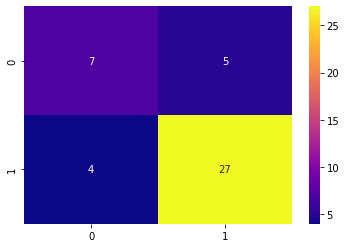

In [ ]:
cn = metrics.confusion_matrix(y_test,rf.predict(X_test))
sns.heatmap(cn,annot=True,cmap='plasma')

Model Testing

In [ ]:
traindata = np.array(train)
predicted = []
for i in range(len(traindata)):
    predicted.append(rf.predict([traindata[i]]))
    
predicted

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does 

[array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),

In [ ]:
resultdf = train.copy()
resultdf['Actual'] = np.array(test)
resultdf['Predicted'] = np.array(predicted)
resultdf.head()

,Gender,Specialisation,Work Experience,SSC_p,High School_p,Degree_p,MBA_p,Actual,Predicted
0,1,1,0,67.00,91.00,58.00,58.80,1,1
1,1,0,1,79.33,78.33,77.48,66.28,1,1
2,1,0,0,65.00,68.00,64.00,57.80,1,1
3,1,1,0,56.00,52.00,52.00,59.43,0,0
4,1,0,0,85.80,73.60,73.30,55.50,1,1


In [ ]:
resultdf['Actual'].value_counts()

1    148
0     67
Name: Actual, dtype: int64

In [ ]:
resultdf['Predicted'].value_counts()

1    157
0     58
Name: Predicted, dtype: int64

Predicted Probability

In [ ]:
traindata = np.array(train)
predicted = []
for i in range(len(traindata)):
    predicted.append(rf.predict_proba([traindata[i]]))
    
predicted

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does 

[array([[0.34301356, 0.65698644]]),
 array([[0.0649872, 0.9350128]]),
 array([[0.28300064, 0.71699936]]),
 array([[0.88845055, 0.11154945]]),
 array([[0.07136612, 0.92863388]]),
 array([[0.80054329, 0.19945671]]),
 array([[0.78553801, 0.21446199]]),
 array([[0.07892288, 0.92107712]]),
 array([[0.07115447, 0.92884553]]),
 array([[0.59661947, 0.40338053]]),
 array([[0.53659366, 0.46340634]]),
 array([[0.07952083, 0.92047917]]),
 array([[0.83460888, 0.16539112]]),
 array([[0.23973601, 0.76026399]]),
 array([[0.74907088, 0.25092912]]),
 array([[0.07734876, 0.92265124]]),
 array([[0.10060238, 0.89939762]]),
 array([[0.78090557, 0.21909443]]),
 array([[0.55680917, 0.44319083]]),
 array([[0.12249647, 0.87750353]]),
 array([[0.13710263, 0.86289737]]),
 array([[0.07195879, 0.92804121]]),
 array([[0.15065979, 0.84934021]]),
 array([[0.09486649, 0.90513351]]),
 array([[0.07090875, 0.92909125]]),
 array([[0.83425659, 0.16574341]]),
 array([[0.06575186, 0.93424814]]),
 array([[0.14636612, 0.8536338

In [ ]:
resultdf['Prob_not_getting_placed'] = np.array([predicted[i][0][0] for i in range(len(predicted))])
resultdf['Prob_getting_placed'] = np.array([predicted[i][0][1] for i in range(len(predicted))])
resultdf

,Gender,Specialisation,Work Experience,SSC_p,High School_p,Degree_p,MBA_p,Actual,Predicted,Prob_not_getting_placed,Prob_getting_placed
0,1,1,0,67.00,91.00,58.00,58.80,1,1,0.343014,0.656986
1,1,0,1,79.33,78.33,77.48,66.28,1,1,0.064987,0.935013
2,1,0,0,65.00,68.00,64.00,57.80,1,1,0.283001,0.716999
3,1,1,0,56.00,52.00,52.00,59.43,0,0,0.888451,0.111549
4,1,0,0,85.80,73.60,73.30,55.50,1,1,0.071366,0.928634
...,...,...,...,...,...,...,...,...,...,...,...
210,1,0,0,80.60,82.00,77.60,74.49,1,1,0.070909,0.929091
211,1,0,0,58.00,60.00,72.00,53.62,1,1,0.209567,0.790433
212,1,0,1,67.00,67.00,73.00,69.72,1,1,0.080691,0.919309
213,0,1,0,74.00,66.00,58.00,60.23,1,1,0.366044,0.633956


In [ ]:
# saving the model

import pickle
file = open('CampusPlacementPrediction.pkl','wb')
pickle.dump(rf,file)
file.close()